In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dataset import Dataset
dataset = Dataset()

In [3]:
def get_image(patch, index):
    """
    Arguments:
      patch: patch image
      index: 0,1,2      
    """
    x = 5*index
    return patch[:, x:x+16].reshape([-1])

In [18]:
k1 = 0.5
k2 = 1.0
sigma_sq = 1.0
sigma_sq_td = 10.0
alpha1 = 0.05
alpha2 = 0.02
lambd = 0.02

U_scale = 0.01
I_scale = 0.1

Us = [np.random.rand(256,32) * U_scale for _ in range(3)]
rs = np.zeros([3, 32], dtype=np.float32)

results = []
errors = []

patch_size = len(dataset.patches)

for k in range(patch_size):
    patch = dataset.patches[k]    
    for i in range(10):
        for j in range(3):
            I = get_image(patch, j) * I_scale            
            r = rs[j]
            U = Us[j]
            Ur = U.dot(r)
            error = I - Ur    
            dr = (k1 / sigma_sq) * U.T.dot(error) - 0.5 * k1 * 2.0 * alpha1 * r
            dU = (k2 / sigma_sq) * np.outer(error, r) - k2 * lambd * U
            rs[j] += dr
            Us[j] += dU
    print(np.mean(Us[0]))

0.004067098027238508
0.0033232112897135166
0.002715571561400726
0.002218723780654906
0.0018130593777540205
0.001481551565052978
0.001210778726254609
0.0009894617621666474
0.0008084395690841793
0.0006605722796936989
0.0005397971076527986
0.0004411208651039002
0.00036038842293543093
0.0002945273454049238
0.00024065953672701483
0.00019666147031643515
0.00016070422534767158
0.0001312385625719379
0.00010721823657191187
8.764016173332044e-05
7.160178572491863e-05
5.8483748104631366e-05
4.778538338831153e-05
3.9044138832612454e-05
3.190307924182973e-05
2.6069706373737742e-05
2.1302345812164955e-05
1.74048143942397e-05
1.4223208979750306e-05
1.1621717115296586e-05
9.4960988984249e-06
7.758890485035335e-06
6.340199661420311e-06
5.1809094951247985e-06
4.233554637807727e-06
3.4631546957816964e-06
2.825739485893773e-06
2.3081407028844816e-06
1.8860678583693467e-06
1.540891002785318e-06
1.260186349225826e-06
1.0298615599385674e-06
8.415993578977303e-07
6.879383942520431e-07
5.62087555967096e-07
4.5

/Users/miyoshi/tensorflow1.7/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in add
/Users/miyoshi/tensorflow1.7/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in add


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


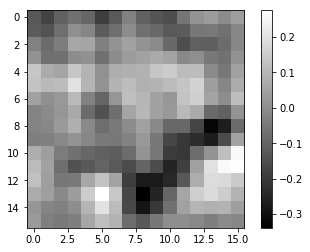

In [72]:
plt.figure()
plt.imshow(I.reshape(16,16), cmap='gray')
plt.colorbar()
plt.show()